#Reconocimiento de Patrones
##Práctica: Clasificación de Números



En esta actividad utilizaremos un modelo de red neuronal para clasificar imagenes de números manuescritos. En el mismo se hará uso de Keras, una API de alto nivel para crear y entrenar modelos en Tensorflow.

Comenzaremos por importar los módulos necesarios e imprimir la versión de Tensorflow

In [1]:
# TensorFlow
import tensorflow as tf

# Numpy y matplotlib para graficar
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.18.0


A continuación importaremos el conjunto de datos (dataset) con el cual trabajaremos. Para este ejemplo usaremos el dataset de Fashion MNIST que contiene 70000 imágenes en escala de grises y 10 categorias. Cada imagen es un artículo de vestir con una resolución de 28 x 28 pixeles.


60000 imágenes son utilizadas para entrenar la red neuronal y 10000 imagenes para evaluar la precisión de la red al momento de clasificar imagenes.

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step 


Al cargar el dataset, tendremos cuatro arreglos de Numpy:

<ul>
<li>train_images y train_labels son los arreglos con datos de entrenamiento que el modelo utiliza para aprender.</li>
<li>test_images y test_labels son los datos con los cuales probamos el modelo.</li>
</ul>

Las imágenes son arreglos de Numpy de tamaño 28 x 28 con valores entre 0 y 255. Las etiquetas son un arreglo de enteros entre 0 y 9.

Cada imagen tiene asignada una etiqueta, sin embargo los nombres de las clases no están incluidos en el dataset. Podemos almacenarlos en una lista para utilizarlos después.


In [3]:
etiquetas = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis', 'Siete', 'Ocho', 'Nueve']

##Preprocesamiento de Datos

Los datos deben ser preprocesados antes de entrenar la red. Si revisamos una imagen en el conjunto de entrenamiento, podemos ver que los valores de los pixeles caen en el rango entre 0 y 255:


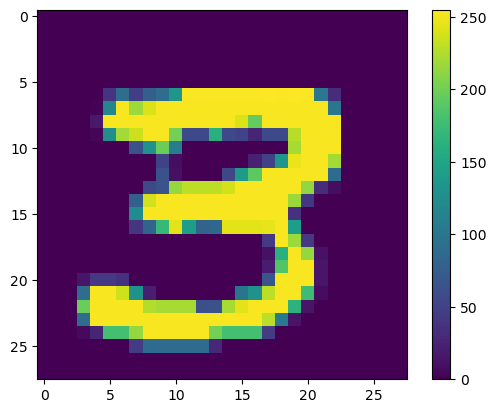

In [4]:
plt.figure()
plt.imshow(train_images[111])
plt.colorbar()
plt.grid(False)
plt.show()

Antes de alimentar los datos a la red neuronal, debemos escalar los valores para que caigan en el rango entre 0 y 1. Es importante escalar tanto los datos de entrenamiento como los de prueba.


In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Veamos los primeros 9 numeros para corroborar que estamos listos para entrenar nuestro modelo.


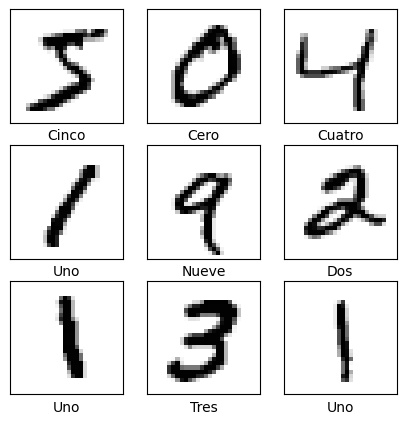

In [6]:
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(etiquetas[train_labels[i]])
plt.show()

##Construcción del Modelo

Necesitamos contruir una red neuronal multicapa para poder lograr el reconocimiento y clasificación de las prendas. Primero configuraremos las capas y posteriormente compilaremos el modelo.


###Configuración de las Capas

El bloque de construcción básico de una red neuronal es una capa (y la neurona, por supuesto). Las capas extraen representaciones a partir de los datos que se les alimentan. Con suerte, estas representaciones son significativas para el problema en cuestión.

Mucho de lo realizado con aprendizaje profundo (deep learning) consiste en secuenciar capas simples una tras otra. La mayoría de las capas, tales como tf.keras.layers.Dense, tienen parámetros que son aprendidos durante el entrenamiento.


In [7]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)), # Convertimos las imagenes en arreglos lineales de tamaño 28x28
                             tf.keras.layers.Dense(128, activation='relu'), # Capa con 128 neuronas conectadas densamente
                             tf.keras.layers.Dense(10)]) # Capa con una neurona por cada clase del dataset

/srv/conda/envs/notebook/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


###Compilación del Modelo

Antes que el modelo esté listo para el entrenamiento, necesita unas configuraciones más, las cuales son agregadas durante el proceso de compilación:

<ul>
<li>Optimizador: Es la forma en que el modelo es actualizado basado en los datos que ve y la función de pérdida.</li>
<li>Función de pérdida: Mide qué tan preciso es el modelo durante el entrenamiento. Queremos minimizar esta función para guiar al modelo en la dirección correcta.</li>
<li>Métricas: Utilizadas para monitorear los pasos de entrenamiento y prueba.</li>
</ul>

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

###Entrenamiento del Modelo

Entrenar el modelo de red neuronal requiere los siguientes pasos:

<ol>
<li>Alimentar los datos de entrenamiento al modelo.</li>
<li>El modelo aprende a asociar imagenes y etiquetas.</li>
<li>Preguntar al modelo por predicciones sobre el conjunto de prueba.</li>
<li>Verificar que las predicciones correspondan con las etiquetas de prueba. </li>
</ol>


####Alimentar al Modelo

Para comenzar el entrenamiento, llamamos el método model.fit del modelo.

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Mientras el entramiento avanza, las métricas de precisión y pérdida se depliegan. El modelo alcanza una precisión de alrededor del 90% en los datos de entrenamiento.


####Evaluar la Precisión

Ahora, comparamos cómo se comporta el modelo con los datos de prueba.

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nPrecisión en datos de prueba: {:1.4f}'.format(test_acc))

313/313 - 1s - 3ms/step - accuracy: 0.9758 - loss: 0.0842

Precisión en datos de prueba: 0.9758


Resulta que la precisión en el dataset de prueba es un poco menor que en los datos de entrenamiento. Esta diferencia entre la precisión de entrenamiento y prueba representa un sobre-entrenamiento. El sobre-entrenamiento sucede cuando un modelo de machine learning se desempeña peor en datos nuevos no antes vistos que en los de entrenamiento.

####Realizar Predicciones

Con el modelo entrenado, ahora podemos hacer predicciones sobre las imágenes. Agregaremos una capa softmax para convertir las salidas lineales del modelo en probabilidades, que serán más fáciles de interpretar.

In [12]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 


En este punto, el modelo ha predicho la etiqueta para cada imagen en el set de prueba. Podemos ver la predicción de la primer imagen:

In [13]:
predictions[0]

array([7.5240938e-11, 2.8489238e-12, 8.8649488e-09, 7.5305447e-06,
       2.1965806e-14, 9.0731972e-10, 2.9301262e-17, 9.9999231e-01,
       8.5902491e-10, 1.2378160e-07], dtype=float32)

Una predicción es un arreglo de 10 números. Cada número representa la confianza del modelo de que la imagen corresponda a cada una de las 10 categorias. Podemos ver cual etiqueta tiene el valor de confianza más alto:


In [14]:
np.argmax(predictions[0])

np.int64(7)

El modelo tiene al rededor del 97% de confianza que la imagen corresponde a la categoria 9. Si examinamos la etiqueta correspondiente en el conjunto de pruebas, observamos que la clasificación es correcta.


In [15]:
test_labels[0]

np.uint8(7)

Momento de practicar. Intenta desplegar la imagen correspondiente al primer artículo en el conjunto de prueba, junto con el nombre del artículo y verifica si la categoría coincide con el artículo predicho por el modelo.


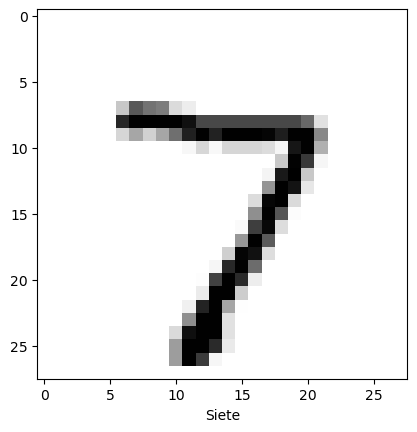

In [19]:
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagenesPrueba[np.argmax(predicciones[i])], cmap=plt.cm.binary)
    plt.xlabel(etiquetas[etiquetasPrueba[np.argmax(predicciones[i])]])
plt.show()